### Import Necessary Libraries

In [1]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop


### Extract data from dataset

In [2]:
fldr="./UTKFace"

In [3]:
import os

In [4]:
files=os.listdir(fldr)

In [5]:
ages=[]
genders=[]
images=[]

for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

## Create list of age and gender from the dataset

In [6]:
for fle in files:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

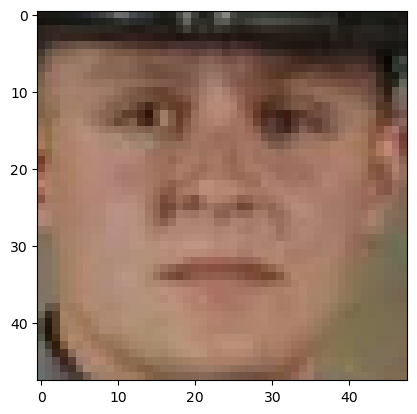

In [7]:
plt.imshow(images[83])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

#### Finding the no. of Male and Female sample repectively

In [12]:
values,counts=np.unique(genders_f,return_counts=True)
print(counts)


[12391 11317]


#### Plotting the no of male and female sample

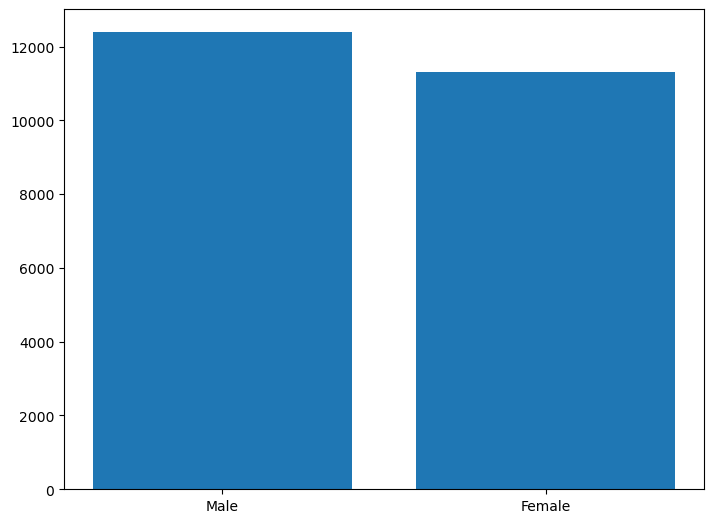

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

#### Finding the no. sample in each age

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


#### Converting Age count to list

In [15]:
val =values.tolist()
cnt=counts.tolist()

#### Plotting the sample agewise

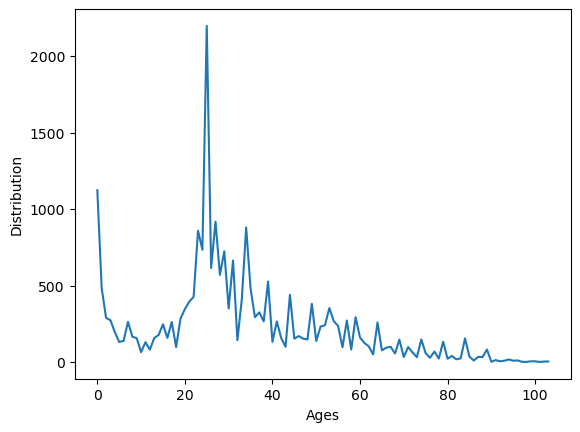

In [16]:
plt.plot(counts)
plt.xlabel("Ages")
plt.ylabel("Distribution")
plt.show()

In [17]:
len(genders)

23708

#### Defining Labels for output

In [18]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

#### Creating another list of images from exsiting one
##### For better learning

In [19]:
images_f_2=images_f/255

In [20]:
images_f_2.shape

(23708, 48, 48, 3)

In [21]:
labels_f=np.array(labels)

#### Splitting the dataset into test and train

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)


In [24]:
Y_train[0:5]

array([[23,  0],
       [ 8,  1],
       [38,  0],
       [ 2,  0],
       [30,  1]])

#### Splitting 'Y_test' and 'Y_train' further
#### for better understanding

In [25]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([0, 1, 0, 0, 1])

In [27]:
Y_train_2[1][0:5]

array([23,  8, 38,  2, 30])

#### Defining model

In [28]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [29]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten= Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model
    

In [30]:
Model = model((48,48,3))

In [31]:
Model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃ Param # ┃ Connected to         ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 48, 48, 3) │       0 │ -                    │
│ (InputLayer)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d (Conv2D)     │ (None, 48, 48,    │     896 │ input_layer[0][0]    │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout (Dropout)   │ (None, 48, 48,    │       0 │ conv2d[0][0]         │
│                     │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation          │ (None, 48, 48,    │       0 │ dropout[0][0]        │
│ (Activation)        │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d       │ (None, 24, 24,    │       0 │ activation[0][0]     │
│ (MaxPooling2D)      │ 32)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 24, 24,    │  18,496 │ max_pooling2d[0][0]  │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_1 (Dropout) │ (None, 24, 24,    │       0 │ conv2d_1[0][0]       │
│                     │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_1        │ (None, 24, 24,    │       0 │ dropout_1[0][0]      │
│ (Activation)        │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_1     │ (None, 12, 12,    │       0 │ activation_1[0][0]   │
│ (MaxPooling2D)      │ 64)               │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 12, 12,    │  73,856 │ max_pooling2d_1[0][… │
│                     │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_2 (Dropout) │ (None, 12, 12,    │       0 │ conv2d_2[0][0]       │
│                     │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_2        │ (None, 12, 12,    │       0 │ dropout_2[0][0]      │
│ (Activation)        │ 128)              │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_2     │ (None, 6, 6, 128) │       0 │ activation_2[0][0]   │
│ (MaxPooling2D)      │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 6, 6, 256) │ 295,168 │ max_pooling2d_2[0][… │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ dropout_3 (Dropout) │ (None, 6, 6, 256) │       0 │ conv2d_3[0][0]       │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ activation_3        │ (None, 6, 6, 256) │       0 │ dropout_3[0][0]      │
│ (Activation)        │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼──────────────────────┤
│ max_pooling2d_3     │ (None, 3, 3, 256) │       0 │ activation_3[0][0]   │
│ (MaxPooling2D)      │                   │         │                      │
├─────────────────────┼───────────────────┼─────────┼────────────────────

 Total params: 683,586 (2.61 MB)

 Trainable params: 683,586 (2.61 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

Intializing the model

In [33]:
fle_s='Age_Sex_Detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor="val_loss",verbose=1,save_best_only=True,save_weights_only=False,mode="auto",save_freq="epoch")
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor="val_loss",restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

#### Running the model
## this will take 4hours time

In [35]:
History = Model.fit(X_train, Y_train_2, batch_size=64, validation_data=(X_test, Y_test_2), epochs=250, callbacks=callback_list)

Epoch 1/250


AttributeError: 'NoneType' object has no attribute 'items'

#### Model Evaluations

In [ ]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 5s 27ms/step - loss: 7.5026 - sex_out_loss: 0.2544 - age_out_loss: 6.1861 - sex_out_accuracy: 0.8954 - age_out_accuracy: 0.0462


[7.502560615539551,
 0.254403680562973,
 6.186050891876221,
 0.895393967628479,
 0.04622912034392357]

In [ ]:
pred=Model.predict(X_test)

186/186 [==============================] - 5s 24ms/step


In [ ]:
pred[1]

array([[36.943604],
       [24.889734],
       [10.853313],
       ...,
       [26.886786],
       [55.56884 ],
       [35.544876]], dtype=float32)

#### Plotting Loss

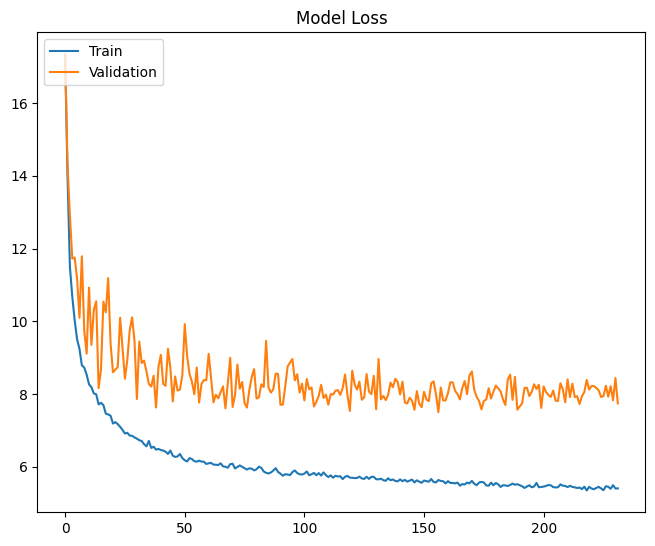

In [ ]:
plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])
plt.title("Model Loss")
plt.xlabel=("Epoch")
plt.ylabel=("Loss")
plt.legend(["Train","Validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

#### Plotting Sex Accuracy

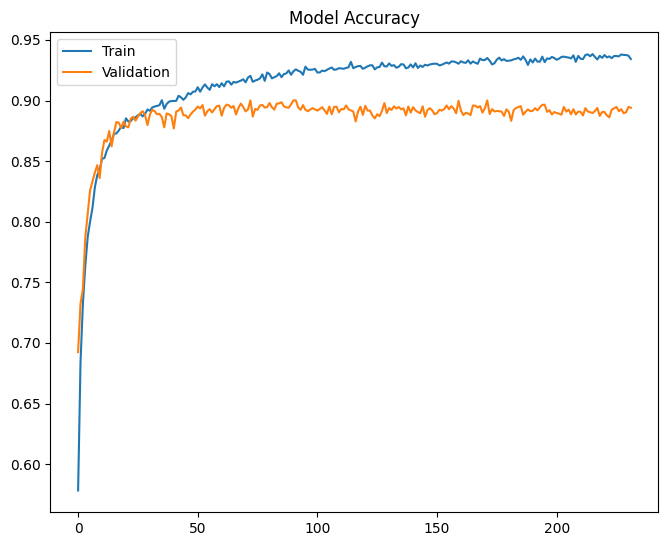

In [ ]:
plt.plot(History.history["sex_out_accuracy"])
plt.plot(History.history["val_sex_out_accuracy"])
plt.title("Model Accuracy")
plt.xlabel=("Epoch")
plt.ylabel=("Accuracy")
plt.legend(["Train","Validation"],loc="upper left")
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

#### Plotting gender accuracy


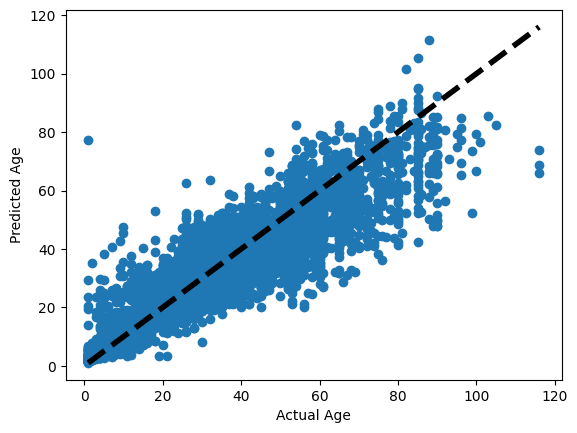

In [ ]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],"k--",lw=4)
ax.set_xlabel("Actual Age")
ax.set_ylabel("Predicted Age")
plt.show()

In [ ]:
i=0
pred_l = []
while (i<len(pred[0])):
    pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3285961045.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_l.append(int(np.round(pred[0][i])))


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### This is making report of the model (Gender only)

In [ ]:
report=classification_report(Y_test_2[0],pred_l)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      3086
           1       0.91      0.87      0.89      2841

    accuracy                           0.90      5927
   macro avg       0.90      0.89      0.89      5927
weighted avg       0.90      0.90      0.90      5927



#### Making heatmap of the model (Gender only)

In [ ]:
results = confusion_matrix(Y_test_2[0],pred_l)

<Axes: >

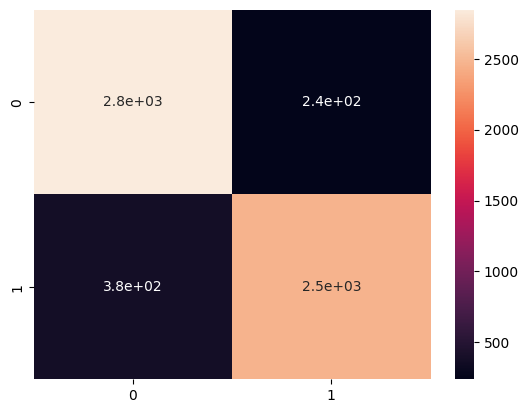

In [ ]:
import seaborn as sns
sns.heatmap(results,annot=True)

#### Testing the image ourself

In [ ]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=["Male","Female"]
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])
    
    

1/1 [==============================] - 0s 82ms/step
Predicted Age is 106
Predicted Gender is Female


C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


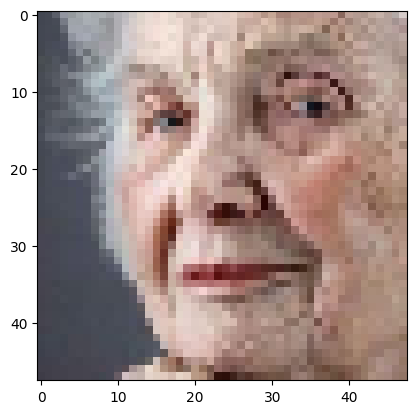

In [ ]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 66ms/step
Predicted Age is 12
Predicted Gender is Male


C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


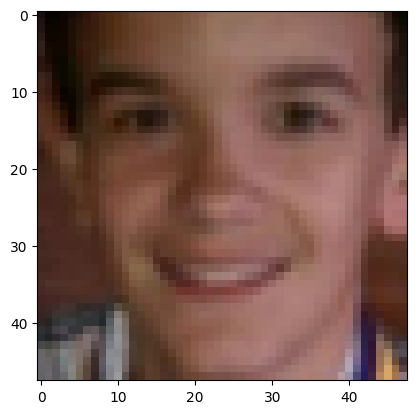

In [ ]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 57ms/step
Predicted Age is 17
Predicted Gender is Female


C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


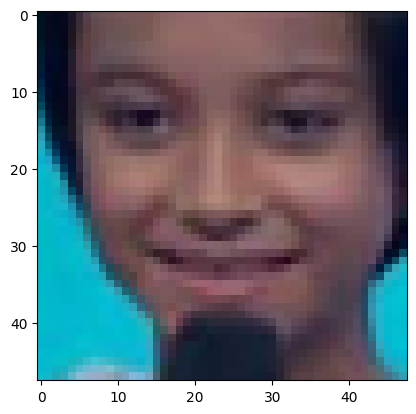

In [ ]:
test_image(168,images_f,images_f_2,Model)

1/1 [==============================] - 0s 94ms/step
Predicted Age is 17
Predicted Gender is Male


C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


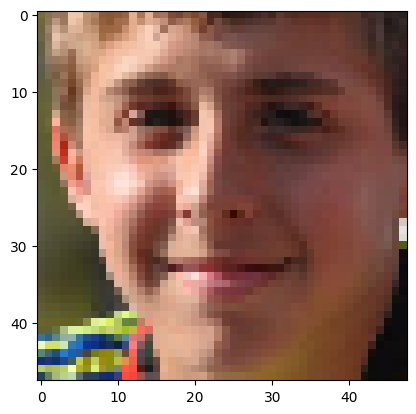

In [ ]:
test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 72ms/step
Predicted Age is 2
Predicted Gender is Male


C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  age=int(np.round(pred_l[1][0]))
C:\Users\shubh\AppData\Local\Temp\ipykernel_2240\3732008563.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  sex=int(np.round(pred_l[0][0]))


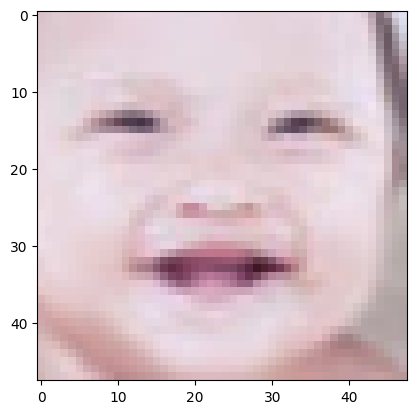

In [ ]:
test_image(1989,images_f,images_f_2,Model)

In [ ]:
test_image(1979,images_f,images_f_2,Model)

NameError: name 'test_image' is not defined